## Insights and Visualizations 

In [3]:
# Cell 1: Imports and Data Loading
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the sentiment_reviews dataset
df = pd.read_csv("E:/Tenx/Week 2/data/processed/sentiment_reviews.csv")

# Parse the date column
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Quick sanity check
print(df.head())


                                              review  rating       date bank  \
0  "Why don’t your ATMs support account-to-accoun...       4 2025-06-06  CBE   
1                        what is this app problem???       1 2025-06-05  CBE   
2       the app is proactive and a good connections.       5 2025-06-05  CBE   
3    I cannot send to cbebirr app. through this app.       3 2025-06-05  CBE   
4                                               good       4 2025-06-05  CBE   

        source sentiment_label  sentiment_score  
0  Google Play        NEGATIVE         0.996465  
1  Google Play        NEGATIVE         0.999623  
2  Google Play        POSITIVE         0.999868  
3  Google Play        NEGATIVE         0.995335  
4  Google Play        POSITIVE         0.999816  


In [4]:
# Cell 2: Identify Top Drivers (Positive Themes) & Pain Points (Negative Themes)

# Explode sentiment_label into separate DataFrames
pos = df[df['sentiment_label'] == 'POSITIVE']
neg = df[df['sentiment_label'] == 'NEGATIVE']

# For this CSV we don't yet have themes, but we can use rating as proxy:
# drivers = rating >= 4, pain points = rating <= 2

drivers = (
    pos
    .groupby('bank')['review']
    .count()
    .reset_index(name='count')
    .assign(type='Driver')
)

pain_points = (
    neg
    .groupby('bank')['review']
    .count()
    .reset_index(name='count')
    .assign(type='Pain Point')
)

insights = pd.concat([drivers, pain_points], ignore_index=True)
print(insights)


     bank  count        type
0     BOA    207      Driver
1     CBE    345      Driver
2  Dashen    344      Driver
3     BOA    293  Pain Point
4     CBE    155  Pain Point
5  Dashen    104  Pain Point


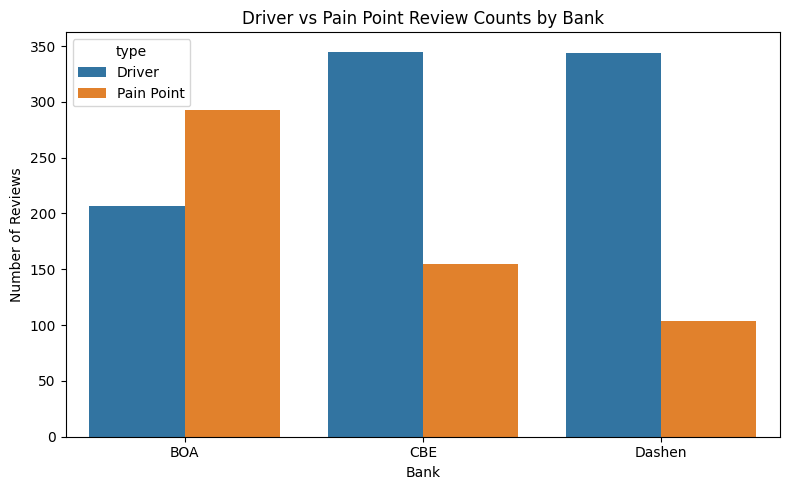

In [5]:
# Cell 3: Visualization 1 — Drivers vs Pain Points by Bank
plt.figure(figsize=(8,5))
sns.barplot(
    data=insights,
    x='bank',
    y='count',
    hue='type'
)
plt.title("Driver vs Pain Point Review Counts by Bank")
plt.ylabel("Number of Reviews")
plt.xlabel("Bank")
plt.tight_layout()
plt.show()


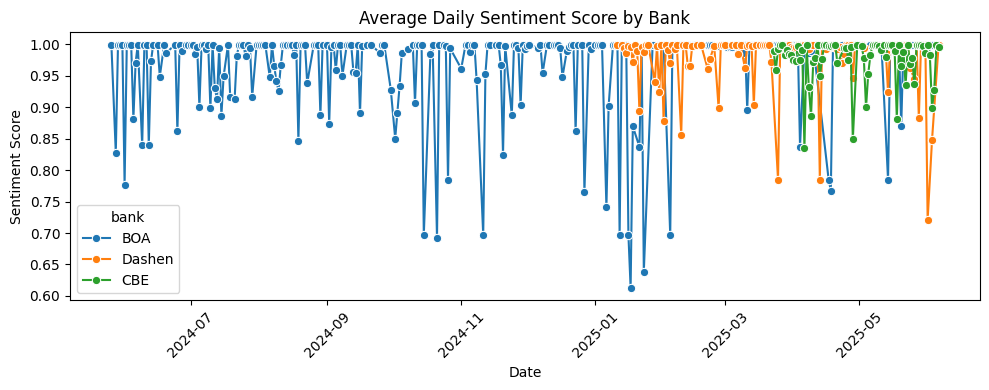

In [6]:
# Cell 5: Visualization 3 — Average Sentiment Score Over Time
# Compute daily average sentiment by bank
daily = (
    df
    .groupby(['date','bank'])['sentiment_score']
    .mean()
    .reset_index()
)

plt.figure(figsize=(10,4))
sns.lineplot(
    data=daily,
    x='date',
    y='sentiment_score',
    hue='bank',
    marker='o'
)
plt.title("Average Daily Sentiment Score by Bank")
plt.xlabel("Date")
plt.ylabel("Sentiment Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
